In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("behavior-performance.txt", sep="\t")

print(data.head())
print(data.columns)

                                     userID  VidID  fracSpent  fracComp  \
0  718eaa5dec19bcf6c7fea0870dd102dbe844fbbb      0   1.145098  0.995568   
1  210f854b0afc3d476d711b2b41379954e48cfa44      0   0.573497  0.858001   
2  e16cf25ff5bb827bf3b5a0c8afeed15c2223a8b5      0   0.778732  0.829160   
3  46dff32368088c11707106514f0450518d19b30d      0   0.639626  0.857684   
4  8a861f5af4ed0668eb03bd8a77d2b7ced04f901e      0   0.786526  0.754330   

   fracPlayed  fracPaused  numPauses    avgPBR        stdPBR  numRWs  numFFs  \
0    0.995568    0.000000          0  1.500000  0.000000e+00       0       0   
1    0.858001    1.998006          6  1.500000  2.220446e-16       0       4   
2    1.137497    0.051103          1  1.462199  8.956206e-02       2       0   
3    0.860312    0.000000          0  1.345555  2.111871e-01       1       7   
4    1.051675    0.000000          0  1.339290  2.451593e-01       6       0   

   s  
0  0  
1  0  
2  1  
3  0  
4  1  
Index(['userID', 'VidID', 

In [2]:
rows_per_video = data.groupby('VidID').size()
print(rows_per_video)

VidID
0     2597
1     1900
2     1524
3     1290
4     1115
      ... 
88      59
89      61
90      50
91      50
92      52
Length: 92, dtype: int64


In [3]:
video_id =90
subset = data[data["VidID"] == video_id]

if len(subset) < 20:
    print(f"Video {video_id} has less than 20 rows.")

else:
  X = subset.drop(columns=["VidID","userID", "s"])
  Y = subset["s"]

In [4]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1500).fit(X_train,Y_train)
Y_pred = model.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print(f"Video {video_id} Accuracy: {acc}")

Video 90 Accuracy: 0.8


In [5]:
video_ids = data['VidID'].unique()

results = {}

for video_id in video_ids:
    subset = data[data['VidID'] == video_id]


    if len(subset) < 20:
        print(f"Video {video_id} has less than 20 rows.")
        results[video_id] = None
        continue


    X = subset.drop(columns=["VidID", "userID", "s"])
    Y = subset["s"]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


    model = LogisticRegression(max_iter=1500)
    model.fit(X_train, Y_train)


    Y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)
    results[video_id] = acc
    print(f"Video {video_id} Accuracy: {acc}")



Video 0 Accuracy: 0.6673076923076923
Video 1 Accuracy: 0.6815789473684211
Video 2 Accuracy: 0.7049180327868853
Video 3 Accuracy: 0.8333333333333334
Video 4 Accuracy: 0.47085201793721976
Video 5 Accuracy: 0.64
Video 6 Accuracy: 0.870253164556962
Video 7 Accuracy: 0.6352941176470588
Video 8 Accuracy: 0.5958549222797928
Video 9 Accuracy: 0.6540880503144654
Video 10 Accuracy: 0.6687898089171974
Video 11 Accuracy: 0.8717948717948718
Video 12 Accuracy: 0.7226890756302521
Video 13 Accuracy: 0.5178571428571429
Video 14 Accuracy: 0.5339805825242718
Video 15 Accuracy: 0.5619047619047619
Video 16 Accuracy: 0.7961165048543689
Video 17 Accuracy: 0.8936170212765957
Video 18 Accuracy: 0.5294117647058824
Video 19 Accuracy: 0.5636363636363636
Video 20 Accuracy: 0.7142857142857143
Video 21 Accuracy: 0.7311827956989247
Video 22 Accuracy: 0.6707317073170732
Video 23 Accuracy: 0.6349206349206349
Video 24 Accuracy: 0.6842105263157895
Video 25 Accuracy: 0.6862745098039216
Video 26 Accuracy: 0.914285714285714

How well can the students be naturally grouped or clustered by their video-watching behavior (fracSpent, fracComp, fracPaused, numPauses, avgPBR, numRWs, and numFFs)? You should use all students that complete at least five of the videos in your analysis.KMeans

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

completed_videos = data.groupby('userID')['VidID'].nunique()
eligible_students = completed_videos[completed_videos >= 5].index
subset = data[data['userID'].isin(eligible_students)]

In [7]:
features = ['fracSpent', 'fracComp', 'fracPaused', 'numPauses', 'avgPBR', 'numRWs', 'numFFs']
X = subset[features]

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

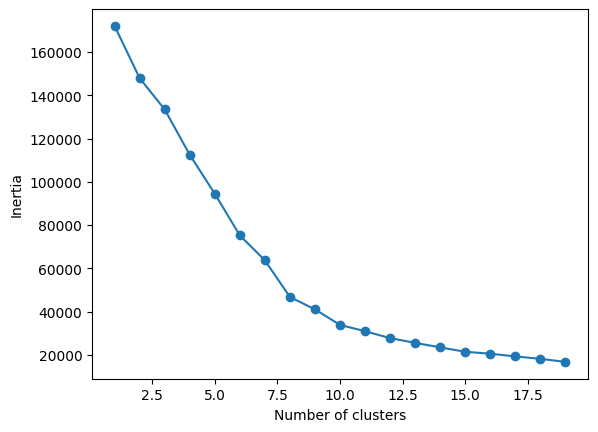

In [9]:
inertia = []
for k in range(1, 20):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 20), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [10]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
subset['cluster'] = clusters

In [11]:
print(subset.groupby('cluster')['userID'].nunique())
print(subset.groupby('cluster')[features].mean())

cluster
0    1505
1    1160
Name: userID, dtype: int64
         fracSpent  fracComp  fracPaused  numPauses    avgPBR    numRWs  \
cluster                                                                   
0        14.197716  0.943066   21.137974   3.006082  1.164795  1.209275   
1        54.527397  0.232517   81.831991   2.457556  0.956257  5.174809   

           numFFs  
cluster            
0        0.493158  
1        4.687551  


In [12]:
label=kmeans.labels_

from collections import Counter
Counter(label)

Counter({0: 18416, 1: 6161})

In [13]:
score=silhouette_score(X,label)
print(score)

0.357349066436208


In [14]:
# The range of Silhouette score is [-1, 1]. Its analysis is as follows −

# +1 Score − Near +1 Silhouette score indicates that the sample is far away from its neighboring cluster.

# 0 Score − 0 Silhouette score indicates that the sample is on or very close to the decision boundary separating two neighboring clusters.

# -1 Score − 1 Silhouette score indicates that the samples have been assigned to the wrong clusters.